Dataset is downloaded from the below link:

- https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv

https://towardsdatascience.com/why-you-shouldnt-use-pandas-get-dummies-for-machine-learning-e088a435beef

https://www.youtube.com/watch?v=s4wZBPQcNVQ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [9]:
df.shape

(1338, 7)

In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [11]:
y = df['expenses']

In [12]:
type(y)

pandas.core.series.Series

In [13]:
x = df.drop(['expenses'], axis =1)

In [14]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


Splitting Data into train and test

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

# Exploratory Data Analysis

Univariate Analysis

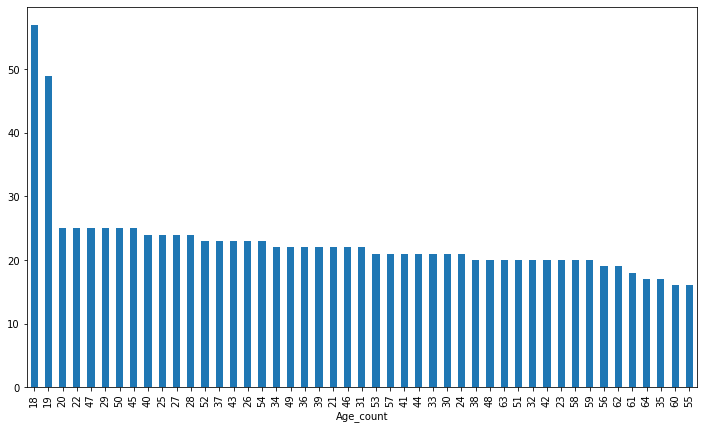

In [16]:
plt.figure(figsize = (12,7))
x_train.age.value_counts().plot.bar()
plt.xlabel('Age_count')
plt.show()

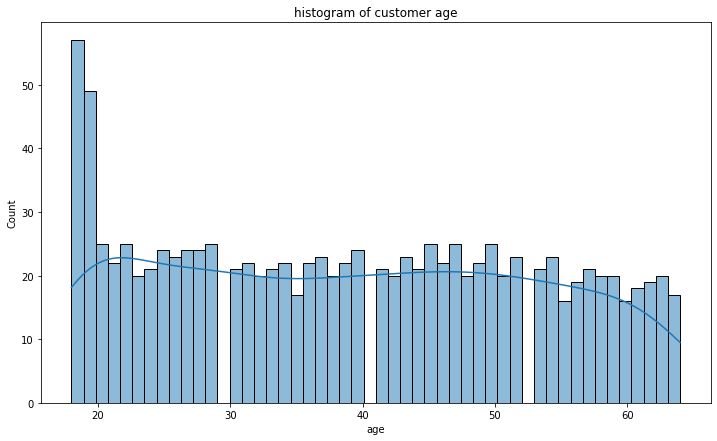

In [17]:
plt.figure(figsize=(12,7))
sns.histplot(x_train.age,kde=True, bins = 50)
plt.title("histogram of customer age")
plt.show()

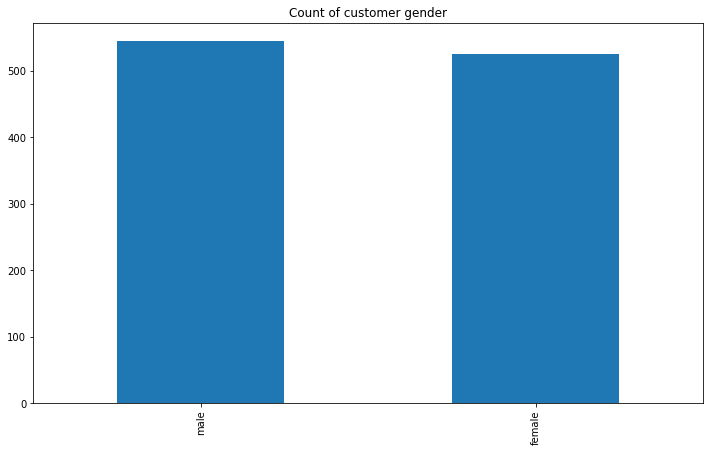

In [18]:
plt.figure(figsize = (12,7))
x_train.sex.value_counts().plot.bar()
plt.title('Count of customer gender')
plt.show()

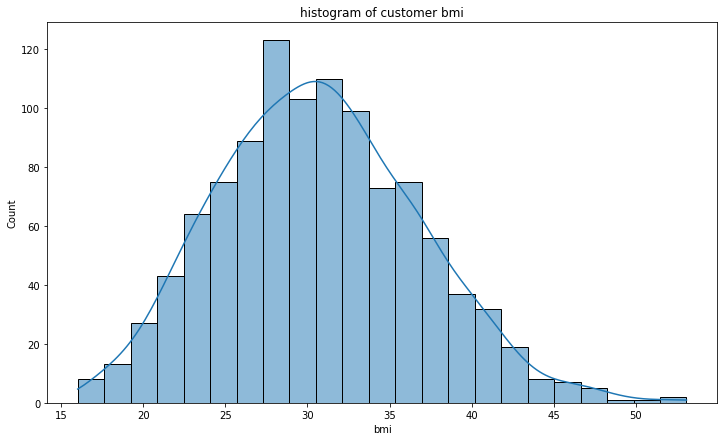

In [19]:
plt.figure(figsize=(12,7))
sns.histplot(x_train.bmi,kde=True)
plt.title("histogram of customer bmi")
plt.show()

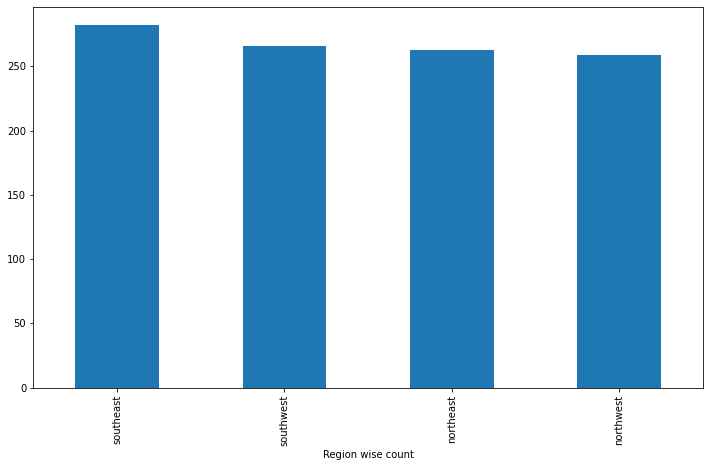

In [20]:
plt.figure(figsize = (12,7))
x_train.region.value_counts().plot.bar()
plt.xlabel('Region wise count')
plt.show()

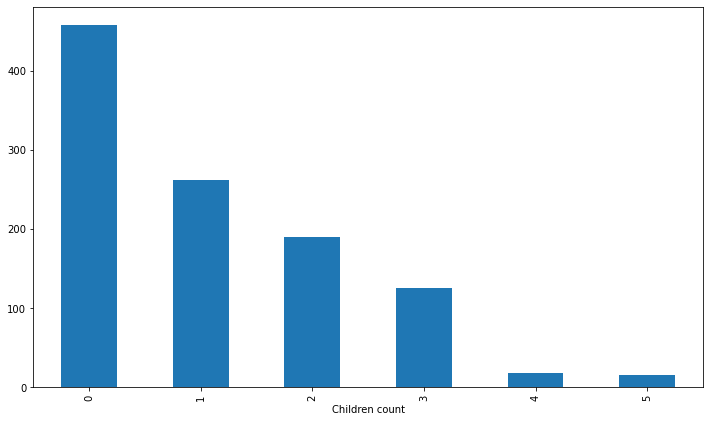

In [21]:
plt.figure(figsize = (12,7))
x_train.children.value_counts().plot.bar()
plt.xlabel('Children count')
plt.show()

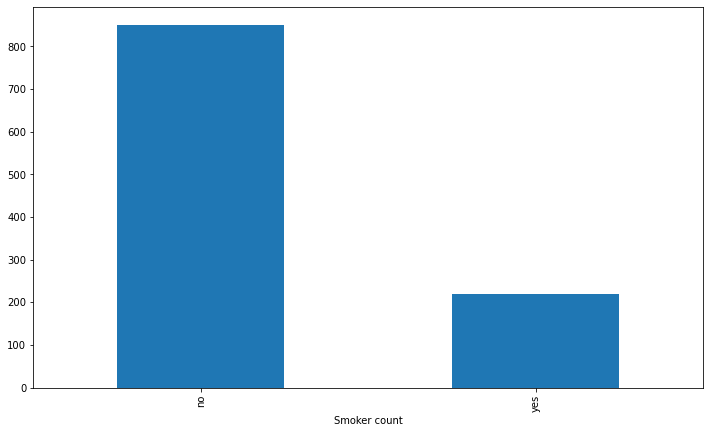

In [22]:
plt.figure(figsize = (12,7))
x_train.smoker.value_counts().plot.bar()
plt.xlabel('Smoker count')
plt.show()

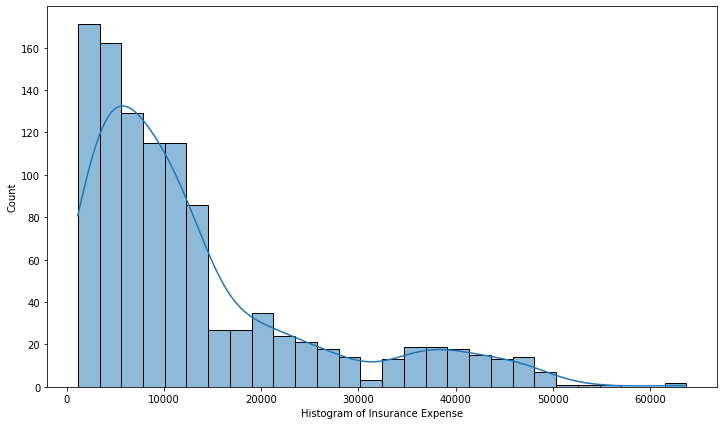

In [23]:
plt.figure(figsize = (12,7))
sns.histplot(y_train, kde = True)
plt.xlabel('Histogram of Insurance Expense')
plt.show()

Bivariate Analysis

In [24]:
df1 = pd.concat([x_train, y_train], axis = 1)
df1

,age,sex,bmi,children,smoker,region,expenses
216,53,female,26.6,0,no,northwest,10355.64
731,53,male,21.4,1,no,southwest,10065.41
866,18,male,37.3,0,no,southeast,1141.45
202,60,female,24.0,0,no,northwest,13012.21
820,45,male,33.7,1,no,southwest,7445.92
...,...,...,...,...,...,...,...
715,60,male,28.9,0,no,southwest,12146.97
905,26,female,29.4,2,no,northeast,4564.19
1096,51,female,35.0,2,yes,northeast,44641.20
235,40,female,22.2,2,yes,southeast,19444.27


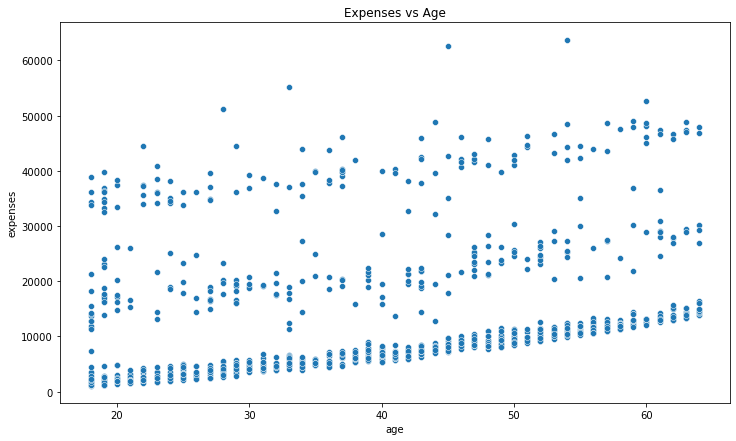

In [25]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='age',y='expenses',data=df1)
plt.title('Expenses vs Age')
plt.show()

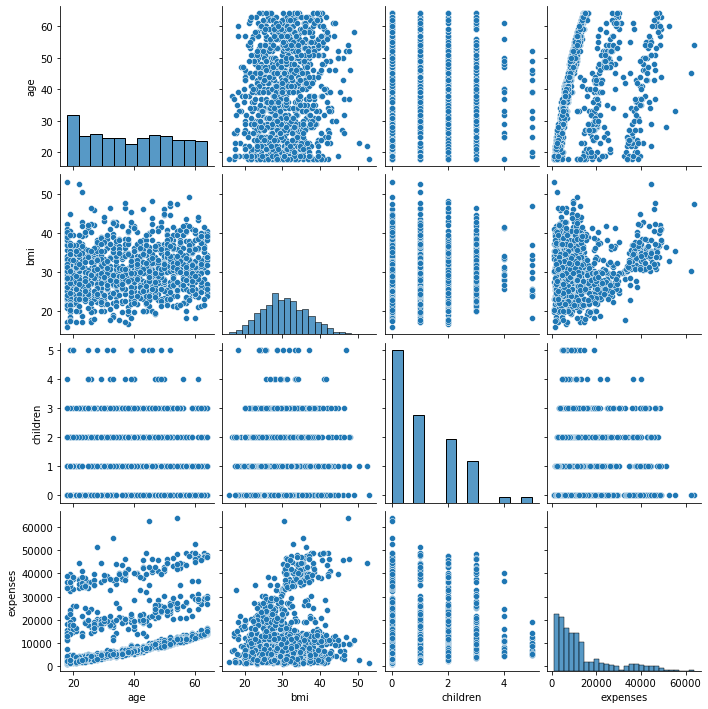

In [26]:
sns.pairplot(data=df1, vars = ['age','bmi','children','expenses'])
plt.show()

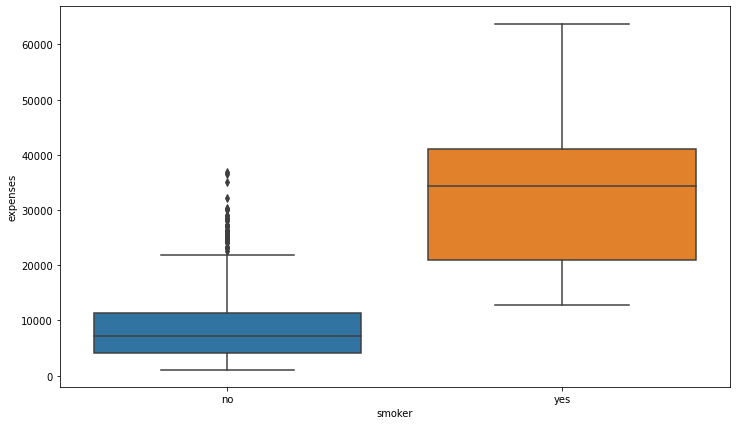

In [27]:
plt.figure(figsize=(12,7))
sns.boxplot(y='expenses',x='smoker',data= df1)
plt.show()

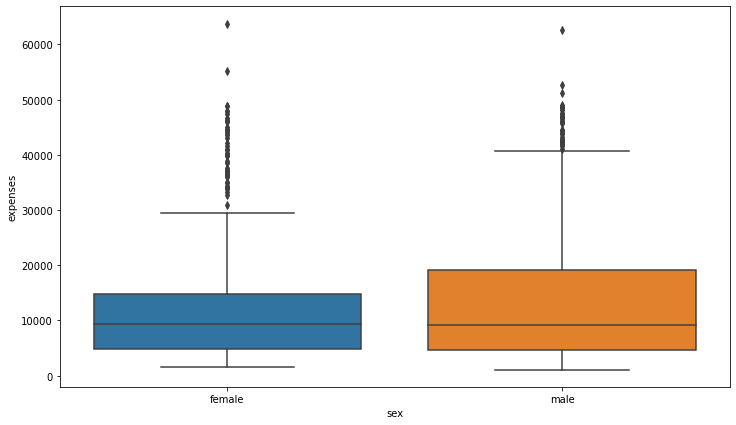

In [28]:
plt.figure(figsize=(12,7))
sns.boxplot(y='expenses',x= 'sex',data= df1)
plt.show()

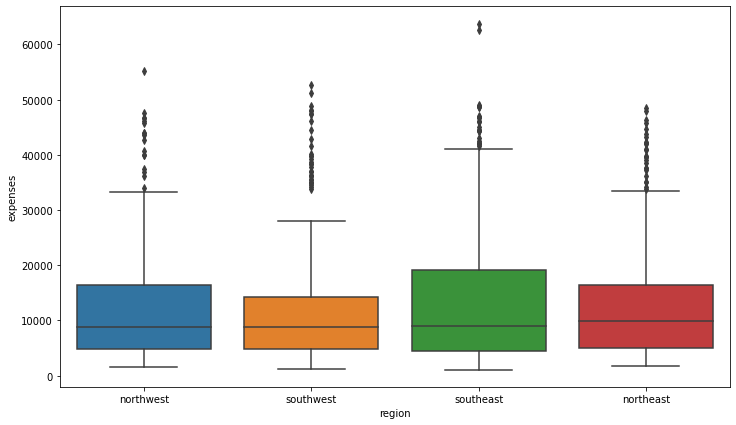

In [29]:
plt.figure(figsize=(12,7))
sns.boxplot(y='expenses',x='region',data= df1)
plt.show()

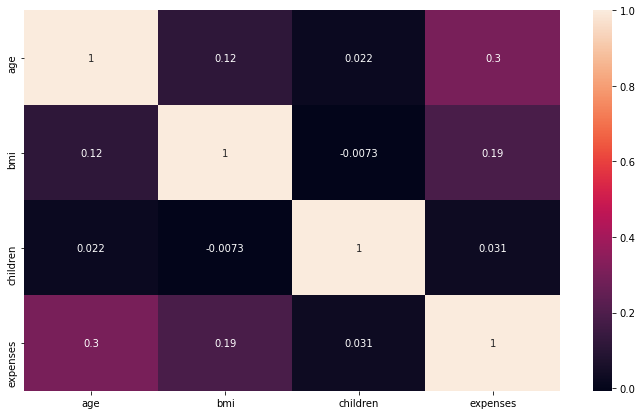

In [30]:
plt.figure(figsize=(12,7))
sns.heatmap(df1[['age','bmi','children','expenses']].corr(), annot=True)
plt.show()

# Summary of E.D.A

- Age with most number of customers are 18 and 19 years
- Customer count based on gender is similar
- Customer count based on region is similar
- Most of the customers don't have any children
- Most of the customers are non-smokers

- As the age increases, minimum health expenses increases
- As bmi increases, chances of higher health expenses can happen

- As compared to non-smokers, health expenses of smokers are higher
- Health expenses based on gender is similar
- Health expenses based on region is similar

- The input variables have very less correlation between each other

# Preprocessing

In [31]:
x_train.reset_index(inplace = True)

In [32]:
x_train['bmi_class'] = '0'

In [33]:
for idx in range(len(x_train)):
    if x_train['bmi'][idx] < 18.5:
        x_train['bmi_class'][idx] = 'underweight'
        
    elif x_train['bmi'][idx] >= 18.5 and x_train['bmi'][idx] < 25:
        x_train['bmi_class'][idx] = 'healthyweight'
        
    elif x_train['bmi'][idx] >= 25 and x_train['bmi'][idx] < 30:
        x_train['bmi_class'][idx] = 'overweight'
        
    else:
        x_train['bmi_class'][idx] = 'obese'

In [34]:
x_train.dtypes

index          int64
age            int64
sex           object
bmi          float64
children       int64
smoker        object
region        object
bmi_class     object
dtype: object

In [35]:
x_train

,index,age,sex,bmi,children,smoker,region,bmi_class
0,216,53,female,26.6,0,no,northwest,overweight
1,731,53,male,21.4,1,no,southwest,healthyweight
2,866,18,male,37.3,0,no,southeast,obese
3,202,60,female,24.0,0,no,northwest,healthyweight
4,820,45,male,33.7,1,no,southwest,obese
...,...,...,...,...,...,...,...,...
1065,715,60,male,28.9,0,no,southwest,overweight
1066,905,26,female,29.4,2,no,northeast,overweight
1067,1096,51,female,35.0,2,yes,northeast,obese
1068,235,40,female,22.2,2,yes,southeast,healthyweight


In [36]:
x_train.drop('index', axis =1, inplace = True)

In [37]:
cat_var = x_train.select_dtypes(include = ['object']).columns
cat_var

Index(['sex', 'smoker', 'region', 'bmi_class'], dtype='object')

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
one_hot_encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [40]:
x_train_ohe = pd.DataFrame(one_hot_encoder.fit_transform(x_train[cat_var]), columns=one_hot_encoder.get_feature_names(), 
                      index = x_train.index)
x_train_ohe

,x0_female,x0_male,x1_no,x1_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest,x3_healthyweight,x3_obese,x3_overweight,x3_underweight
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1066,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1067,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1068,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [41]:
x_train_ohe = x_train_ohe.astype('int')
x_train_ohe

,x0_female,x0_male,x1_no,x1_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest,x3_healthyweight,x3_obese,x3_overweight,x3_underweight
0,1,0,1,0,0,1,0,0,0,0,1,0
1,0,1,1,0,0,0,0,1,1,0,0,0
2,0,1,1,0,0,0,1,0,0,1,0,0
3,1,0,1,0,0,1,0,0,1,0,0,0
4,0,1,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,0,1,1,0,0,0,0,1,0,0,1,0
1066,1,0,1,0,1,0,0,0,0,0,1,0
1067,1,0,0,1,1,0,0,0,0,1,0,0
1068,1,0,0,1,0,0,1,0,1,0,0,0


In [42]:
x_train_ohe.columns

Index(['x0_female', 'x0_male', 'x1_no', 'x1_yes', 'x2_northeast',
       'x2_northwest', 'x2_southeast', 'x2_southwest', 'x3_healthyweight',
       'x3_obese', 'x3_overweight', 'x3_underweight'],
      dtype='object')

In [43]:
num_var = x_train.select_dtypes(include = ['int', 'float']).columns
num_var

Index(['age', 'bmi', 'children'], dtype='object')

In [44]:
x_train_num = x_train[num_var]

In [45]:
x_train_new = pd.concat([x_train_ohe,x_train_num], axis=1).reset_index(drop=True)
x_train_new

,x0_female,x0_male,x1_no,x1_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest,x3_healthyweight,x3_obese,x3_overweight,x3_underweight,age,bmi,children
0,1,0,1,0,0,1,0,0,0,0,1,0,53,26.6,0
1,0,1,1,0,0,0,0,1,1,0,0,0,53,21.4,1
2,0,1,1,0,0,0,1,0,0,1,0,0,18,37.3,0
3,1,0,1,0,0,1,0,0,1,0,0,0,60,24.0,0
4,0,1,1,0,0,0,0,1,0,1,0,0,45,33.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,0,1,1,0,0,0,0,1,0,0,1,0,60,28.9,0
1066,1,0,1,0,1,0,0,0,0,0,1,0,26,29.4,2
1067,1,0,0,1,1,0,0,0,0,1,0,0,51,35.0,2
1068,1,0,0,1,0,0,1,0,1,0,0,0,40,22.2,2


In [46]:
x_train_new = x_train_new.rename(columns={'x1_no': 'x1_smoker_no', 'x1_yes': 'x1_smoker_yes'})

In [47]:
x_train_new

,x0_female,x0_male,x1_smoker_no,x1_smoker_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest,x3_healthyweight,x3_obese,x3_overweight,x3_underweight,age,bmi,children
0,1,0,1,0,0,1,0,0,0,0,1,0,53,26.6,0
1,0,1,1,0,0,0,0,1,1,0,0,0,53,21.4,1
2,0,1,1,0,0,0,1,0,0,1,0,0,18,37.3,0
3,1,0,1,0,0,1,0,0,1,0,0,0,60,24.0,0
4,0,1,1,0,0,0,0,1,0,1,0,0,45,33.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,0,1,1,0,0,0,0,1,0,0,1,0,60,28.9,0
1066,1,0,1,0,1,0,0,0,0,0,1,0,26,29.4,2
1067,1,0,0,1,1,0,0,0,0,1,0,0,51,35.0,2
1068,1,0,0,1,0,0,1,0,1,0,0,0,40,22.2,2


Test Data Preprocessing

In [48]:
x_test.reset_index(inplace = True)
x_test['bmi_class'] = '0'

In [49]:
for idx in range(len(x_test)):
    if x_test['bmi'][idx] < 18.5:
        x_test['bmi_class'][idx] = 'underweight'
        
    elif x_test['bmi'][idx] >= 18.5 and x_test['bmi'][idx] < 25:
        x_test['bmi_class'][idx] = 'healthyweight'
        
    elif x_test['bmi'][idx] >= 25 and x_test['bmi'][idx] < 30:
        x_test['bmi_class'][idx] = 'overweight'
        
    else:
        x_test['bmi_class'][idx] = 'obese'

In [50]:
x_test

,index,age,sex,bmi,children,smoker,region,bmi_class
0,559,19,male,35.5,0,no,northwest,obese
1,1087,57,male,31.5,0,no,northwest,obese
2,1020,51,male,37.0,0,no,southwest,obese
3,460,49,female,36.6,3,no,southeast,obese
4,802,21,male,22.3,1,no,southwest,healthyweight
...,...,...,...,...,...,...,...,...
263,682,39,male,35.3,2,yes,southwest,obese
264,629,44,female,39.0,0,yes,northwest,obese
265,893,47,male,38.9,2,yes,southeast,obese
266,807,19,female,36.6,0,no,northwest,obese


In [51]:
x_test.drop('index', axis =1, inplace = True)

In [52]:
x_test_ohe = pd.DataFrame(one_hot_encoder.transform(x_test[cat_var]), columns=one_hot_encoder.get_feature_names(), 
                      index = x_test.index)
x_test_ohe

,x0_female,x0_male,x1_no,x1_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest,x3_healthyweight,x3_obese,x3_overweight,x3_underweight
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
264,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
265,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
266,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
x_test_ohe = x_test_ohe.astype('int')
x_test_ohe

,x0_female,x0_male,x1_no,x1_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest,x3_healthyweight,x3_obese,x3_overweight,x3_underweight
0,0,1,1,0,0,1,0,0,0,1,0,0
1,0,1,1,0,0,1,0,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,0,0
3,1,0,1,0,0,0,1,0,0,1,0,0
4,0,1,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,1,0,1,0,0,0,1,0,1,0,0
264,1,0,0,1,0,1,0,0,0,1,0,0
265,0,1,0,1,0,0,1,0,0,1,0,0
266,1,0,1,0,0,1,0,0,0,1,0,0


In [54]:
x_test_num = x_test[num_var]

In [55]:
x_test_new = pd.concat([x_test_ohe,x_test_num], axis=1).reset_index(drop=True)
x_test_new

,x0_female,x0_male,x1_no,x1_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest,x3_healthyweight,x3_obese,x3_overweight,x3_underweight,age,bmi,children
0,0,1,1,0,0,1,0,0,0,1,0,0,19,35.5,0
1,0,1,1,0,0,1,0,0,0,1,0,0,57,31.5,0
2,0,1,1,0,0,0,0,1,0,1,0,0,51,37.0,0
3,1,0,1,0,0,0,1,0,0,1,0,0,49,36.6,3
4,0,1,1,0,0,0,0,1,1,0,0,0,21,22.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,1,0,1,0,0,0,1,0,1,0,0,39,35.3,2
264,1,0,0,1,0,1,0,0,0,1,0,0,44,39.0,0
265,0,1,0,1,0,0,1,0,0,1,0,0,47,38.9,2
266,1,0,1,0,0,1,0,0,0,1,0,0,19,36.6,0


In [56]:
x_test_new = x_test_new.rename(columns={'x1_no': 'x1_smoker_no', 'x1_yes': 'x1_smoker_yes'})

In [57]:
x_test_new

,x0_female,x0_male,x1_smoker_no,x1_smoker_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest,x3_healthyweight,x3_obese,x3_overweight,x3_underweight,age,bmi,children
0,0,1,1,0,0,1,0,0,0,1,0,0,19,35.5,0
1,0,1,1,0,0,1,0,0,0,1,0,0,57,31.5,0
2,0,1,1,0,0,0,0,1,0,1,0,0,51,37.0,0
3,1,0,1,0,0,0,1,0,0,1,0,0,49,36.6,3
4,0,1,1,0,0,0,0,1,1,0,0,0,21,22.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,1,0,1,0,0,0,1,0,1,0,0,39,35.3,2
264,1,0,0,1,0,1,0,0,0,1,0,0,44,39.0,0
265,0,1,0,1,0,0,1,0,0,1,0,0,47,38.9,2
266,1,0,1,0,0,1,0,0,0,1,0,0,19,36.6,0


# Model Creation

KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [58]:
from sklearn.neighbors import KNeighborsRegressor

In [59]:
n_folds = 10
neighbors = list(range(1,20,2))

In [60]:
cv = KFold(n_splits = n_folds, shuffle=True, random_state=1)

#sorted(sklearn.metrics.SCORERS.keys())
- https://scikit-learn.org/stable/modules/model_evaluation.html

In [61]:
score = []
for k in neighbors:
    model = KNeighborsRegressor(k)
    scores =cross_val_score(model, x_train_new, y_train, cv=cv, scoring='neg_root_mean_squared_error')#default scoring is 'r2'
    score.append(scores.mean())

In [62]:
score

[-11676.651023569202,
 -10352.523887373198,
 -10454.335012194166,
 -10583.183071497855,
 -10659.92652324108,
 -10726.59073356522,
 -10719.828957582034,
 -10745.336190978058,
 -10842.546125563811,
 -10903.818606257551]

In [63]:
optimal_k = neighbors[score.index(max(score))]

In [64]:
optimal_k

3

In [65]:
from sklearn import metrics

In [66]:
model = KNeighborsRegressor(optimal_k)
model.fit(x_train_new,y_train)

KNeighborsRegressor(n_neighbors=3)

In [67]:
y_pred = model.predict(x_test_new)

In [68]:
mae = metrics.mean_absolute_error(y_test,y_pred)
mae

6960.922201492537

In [69]:
model_mae = dict()

In [70]:
model_mae['knn'] = mae

Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
model = LinearRegression()
model.fit(x_train_new, y_train)

LinearRegression()

In [73]:
y_pred = model.predict(x_test_new)

In [74]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

4085.571956720936

In [75]:
model.score(x_train_new, y_train) #Coefficient of determination (r2)

0.7531353373819346

In [76]:
model_mae['linear_reg'] = mae

In [77]:
model_mae

{'knn': 6960.922201492537, 'linear_reg': 4085.571956720936}

In [78]:
model.coef_

array([   120.87980661,   -120.87980661, -11908.4837283 ,  11908.4837283 ,
          550.10197455,    106.42603917,   -290.86945567,   -365.65855805,
         -548.76225214,   2733.85490203,   -225.80190718,  -1959.29074271,
          257.34607945,    104.90414436,    415.85381598])

Decision Tree